In [1]:
from preamble import *
%matplotlib inline
import pandas as pd

### Decision Tree in Regression

- are decision-making trees which are developed by an algorithm. A cat's decision-making tree would probably look like this - ![](images/05_decision_tree_refresher_0.jpg)

- is a supervised learning algorithm
- can be used to classify data and to predict a floating-point value as well (regression)

In [2]:
cancer_df = pd.read_csv('data/breast_cancer_wisconsin/full.csv', index_col=0)

We are going to predict clump thickness, with our decision tree regressor. Let's see what the spread looks like.

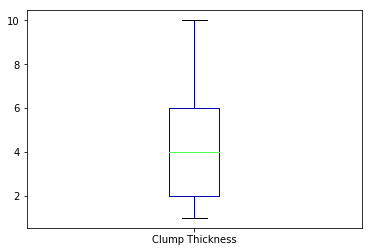

In [13]:
_ = cancer_df['Clump Thickness'].plot(kind='box')

The ID3 Decision Tree Regression algorithm uses Standard Deviation Reduction to decide where to split the data. 
While the Decision Tree Classifier uses Entropy to split the data.

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [20]:
dtree_regressor = DecisionTreeRegressor()
cancer_target = cancer_df.pop('Clump Thickness')
cancer_data = cancer_df

In [29]:
train_x, train_y, test_x,  test_y = train_test_split(cancer_data, cancer_target, test_size=0.25, random_state=42)

In [43]:
train_x.shape, test_x.shape

((524, 9), (524,))

In [35]:
model_fit = dtree_regressor.fit(train_x, test_x)
prediction = dtree_regressor.predict(train_y)

In [51]:
dot_data = StringIO()
export_graphviz(model_fit, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=cancer_data.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


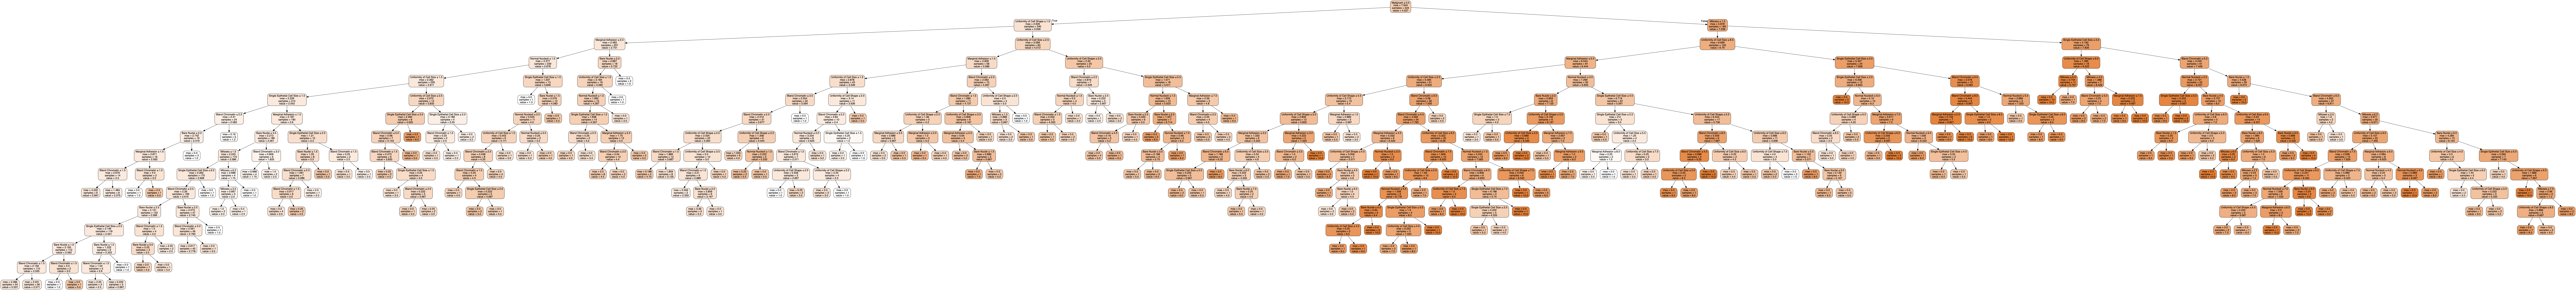

In [52]:
Image(graph.create_png())

Standard deviation reduction as a metric - https://www.saedsayad.com/decision_tree_reg.htm

### Linear regression

- When we do linear regression, we assume that the relationship between the response variable and the predictors is linear.

- "Hetero-sceda-sticity means unequal scatter. In regression analysis, we talk about heteroscedasticity in the context of the residuals or error term. Specifically, heteroscedasticity is a systematic change in the spread of the residuals over the range of measured values. Heteroscedasticity is a problem because ordinary least squares (OLS) regression assumes that all residuals are drawn from a population that has a constant variance (homoscedasticity)."

Types of linear regression 
	- Basic linear regression
    - Multiple (independent variable) regression 
        - Ordinary least squares regression (OLS)
            - assumes there is not a strong correlation between any two independent variables
        - Generalised least squares regression (GLS)
            - deals with correlated independent variables by transforming the data and then using OLS to build the 
              model with transformed data.

Basic linear regression (x-y axis line fitting)
![](images/05_linear_regression_0.png)

Multiple linear regression 
![](images/05_linear_regression_1.png)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression()
regressor.fit(train_x, test_x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
prediction = regressor.predict(train_y)
print("Mean squared error: {:,.2f}".format(mean_squared_error(test_y, prediction)))

Mean squared error: 3.43
